<a href="https://colab.research.google.com/github/Mattshanevdberg/ML-FruitPunchAI_BootCamp/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing required libraries 
import tensorflow as tf 
# from tensorflow.keras import Model, Input 
# from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout, Rescaling
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os 
#from google_drive_downloader import GoogleDriveDownloader as gdd 
# import shutil
import gdown
from numpy import load
from google.colab import drive

# setting random seeds 
# np.random.seed(0)
# tf.random.set_seed(0)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

# print tensorflow version
# tf.__version__

#STEP 0: Load Data

##STEP 0.1 - 
Data has been loaded onto own drive to work with. 

Now zip the images and annotation folders so they can be used in the Notebook (this will only have to be done once)

Now unzip them in the Notebook (now we can work with them)


In [3]:
#only done the first time (do not run this block if you aren't Matt)
drive.mount('/content/gdrive')
# going to folder where zip must happen
%cd gdrive/MyDrive/Wildlife_12-2022_Matthew_Alexandra_Traun_Enala/
#zipping images
# !zip -r images.zip images/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Wildlife_12-2022_Matthew_Alexandra_Traun_Enala


In [5]:
#zip COCO annotations for loading
!zip -r annotations_COCO.zip annotations_COCO/

  adding: annotations_COCO/ (stored 0%)
  adding: annotations_COCO/Copy of instances_test.json (deflated 90%)
  adding: annotations_COCO/Copy of instances_val.json (deflated 90%)
  adding: annotations_COCO/Copy of instances_train.json (deflated 91%)


In [6]:
#Get back to the /content folder 
%cd ..
%cd ..
%cd ..

/content/gdrive/MyDrive
/content/gdrive
/content


In [9]:
#to be deleted
!pwd

/content


In [7]:
#This will need to be done every session
#Load data from the shared drive (images)
#https://drive.google.com/file/d/1wrjG77U3ae7JUYIGxn3dnyhDOpwOIcE1/view?usp=sharing
#!gdown --id 1wrjG77U3ae7JUYIGxn3dnyhDOpwOIcE1 - file is too large to use this method so using the method below
file_id = "1wrjG77U3ae7JUYIGxn3dnyhDOpwOIcE1"
gdown.download(
    f"https://drive.google.com/uc?export=download&confirm=pbef&id={file_id}"
)

#Load data from the shared drive (COCO anotations)
#https://drive.google.com/file/d/1_4Lkg4bG2xpQih3jCrehPrHDKSqWON2-/view?usp=sharing
!gdown --id 1_4Lkg4bG2xpQih3jCrehPrHDKSqWON2-
#!pip install --upgrade --no-cache-dir gdown

#Load data from the shared drive (.yaml file) - This has been created and edited already
#https://drive.google.com/file/d/1_SSQMmbZesL578IVj-pz8IHiWMm4b4gl/view?usp=sharing
!gdown --id 1_SSQMmbZesL578IVj-pz8IHiWMm4b4gl

# # #https://drive.google.com/file/d/1Ger_cgbqilVW6K6xXlYGcNQBzn1YBFf8/view?usp=sharing

# file_id = "1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe"
# gdown.download(
#     f"https://drive.google.com/uc?export=download&confirm=pbef&id={file_id}"
# )

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1wrjG77U3ae7JUYIGxn3dnyhDOpwOIcE1 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_4Lkg4bG2xpQih3jCrehPrHDKSqWON2-
To: /content/annotations_COCO.zip
100% 1.51M/1.51M [00:00<00:00, 181MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecat

In [10]:
#unzip all images
!unzip -u "images.zip" -d "/content/images"
#unzip all annotations
!unzip -u "annotations_COCO.zip" -d "/content/annotations_COCO"

Streaming output truncated to the last 5000 lines.
  inflating: /content/images/images/val/video53_1_000460.PNG  
  inflating: /content/images/images/val/videobh_41_000105.PNG  
  inflating: /content/images/images/val/video53_1_003002.PNG  
  inflating: /content/images/images/val/videobh_1_000329.PNG  
  inflating: /content/images/images/val/video78_1_000648.PNG  
  inflating: /content/images/images/val/videobh_2_005168.PNG  
  inflating: /content/images/images/val/videobh_2_000830.PNG  
  inflating: /content/images/images/val/video53_4_000164.PNG  
  inflating: /content/images/images/val/video53_8_000207.PNG  
  inflating: /content/images/images/val/videobh_3_000554.PNG  
  inflating: /content/images/images/val/video53_2_001707.PNG  
  inflating: /content/images/images/val/videobh_1_002054.PNG  
  inflating: /content/images/images/val/videobh_1_001078.PNG  
  inflating: /content/images/images/val/videobh_1_002317.PNG  
  inflating: /content/images/images/val/videobh_2_005119.PNG  
  i

In [ ]:
#place images in the correct folders


##DID NOT USE

### DID NOT USE: Method used in the actual challenge

In [ ]:
# downloading the classification dataset from google drive 
url='https://drive.google.com/file/d/1EqPczd5IbO7tdqnV2zQWKesLACpZUlQl/view?usp=sharing'
file_id = url.split('/')[-2]
gdd.download_file_from_google_drive(file_id=file_id, dest_path='/content/classification_dataset.zip', unzip=True)

In [ ]:
# specifying folderpaths for train, val, test folders for poachers and no_poachers
folderpath_train = '/content/classification_dataset/Labeled data/images/train'
folderpath_val   = '/content/classification_dataset/images/val'
#folderpath_test  = '/content/classification_dataset/test/'
# folderpath_train_poachers   = os.path.join(folderpath_train,'poacher_images')
# folderpath_train_nopoachers = os.path.join(folderpath_train,'no_poacher_images')
# folderpath_val_poachers     = os.path.join(folderpath_val,'poacher_images')
# folderpath_val_nopoachers   = os.path.join(folderpath_val,'no_poacher_images')
# folderpath_test_poachers    = os.path.join(folderpath_test,'poacher_images')
# folderpath_test_nopoachers  = os.path.join(folderpath_test,'no_poacher_images')

# printing file counts 
print(len(os.listdir('/content/classification_dataset/')), 'trainset images' )
# print(len(os.listdir(folderpath_train_nopoachers)), 'trainset without poacher images')
# print(len(os.listdir(folderpath_val_poachers)), 'valset poacher images' )
# print(len(os.listdir(folderpath_val_nopoachers)), 'valset without poacher images')
# print(len(os.listdir(folderpath_test_poachers)), 'testset poacher images' )
# print(len(os.listdir(folderpath_test_nopoachers)), 'testset without poacher images')

FileNotFoundError: ignored

### DID NOT USE: Method used in challenges


In [6]:
#Test Image Data 
#https://drive.google.com/drive/folders/1WotqoOagFOxNTLHL3SAFDsvQHFOfP8Wo?usp=sharing
# #download the data
#!pip install --upgrade --no-cache-dir gdown
!gdown --id 1WotqoOagFOxNTLHL3SAFDsvQHFOfP8Wo

# # #https://drive.google.com/file/d/1Ger_cgbqilVW6K6xXlYGcNQBzn1YBFf8/view?usp=sharing

# file_id = "1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe"
# gdown.download(
#     f"https://drive.google.com/uc?export=download&confirm=pbef&id={file_id}"
# )

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1WotqoOagFOxNTLHL3SAFDsvQHFOfP8Wo 



In [ ]:
# train = load('/content/Labeled data-20211126T095740Z-001.zip')

In [ ]:
# train_X = []
# train_X = train['Labeled data/images/train/video53_1_003468.PNG']
# train_X[0:5]


b'\x89PNG\r'

### DID NOT USE: Attempting to download dataset again...(method 3 - from the internet)

In [ ]:
import os
import sys
from pycocotools.coco import COCO
import urllib
import zipfile

In [ ]:
# don't need to do this step as we already have the file
market1501_url = 'https://drive.google.com/file/d/1EqPczd5IbO7tdqnV2zQWKesLACpZUlQl/view?usp=share_link'
urllib.request.urlretrieve(market1501_url , filename = 'market1501.zip' )

In [ ]:
with zipfile.ZipFile('/content/Labeled data-20211126T095740Z-001.zip' , 'r') as zip_ref:
    zip_ref.extractall()

#STEP 1: get familiar with visualizing the data and annotations

## Some useful sorces on COCO and visualizing data/using COCO:

https://www.neuralception.com/cocodatasetapi/

https://towardsdatascience.com/how-to-work-with-object-detection-datasets-in-coco-format-9bf4fb5848a4#:~:text=The%20%E2%80%9CCOCO%20format%E2%80%9D%20is%20a,with%20your%20COCO%20formatted%20data.

https://medium.com/mlearning-ai/coco-dataset-what-is-it-and-how-can-we-use-it-e34a5b0c6ecd


##1.1 Playing with COCO and data visualization
Loading the data and viewing it in the COCO format (allows you to see the bounding boxes)

###1.1.1 Visualizing the images with the bounding boxes

In [11]:
#installing some libs
!pip install pycocotools
from pycocotools.coco import COCO
import skimage.io as io
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
annFile = Path('/content/annotations_COCO/annotations_COCO/Copy of instances_train.json')
dataDir=Path('/content/images/images/train')


coco = COCO(annFile)
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds[0:2])

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!


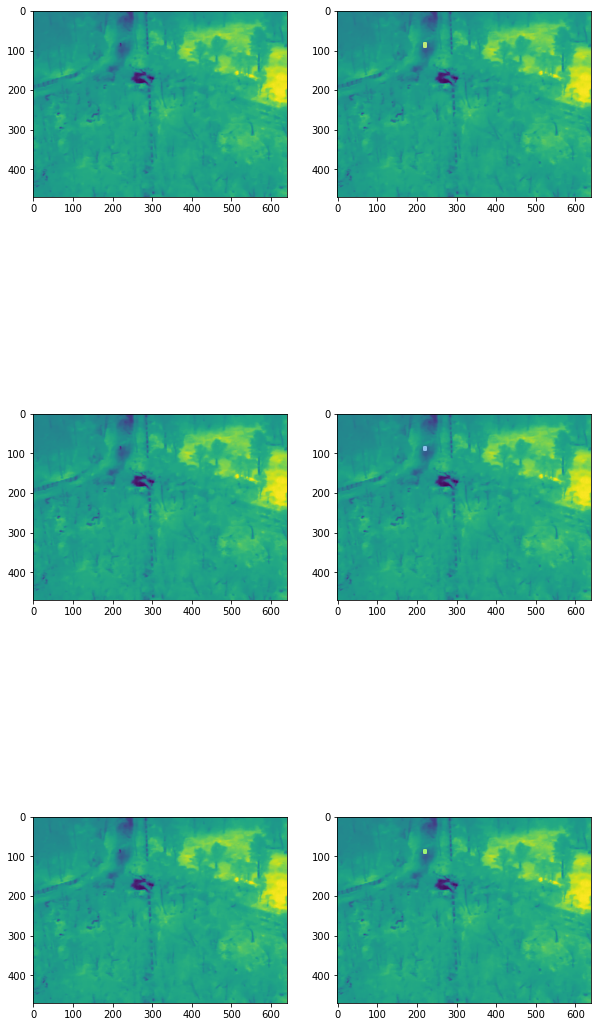

In [16]:

imgs = coco.loadImgs(imgIds[110:113])
_,axs = plt.subplots(len(imgs),2,figsize=(10,7 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

###1.1.2 Number of classes

###1.1.3 Amount of Labled Data

###1.1.4 data with poachers vs not 

##1.1 Conclusion notes on the data

Some notes on the data: 

-The objects are very small for detection 

-There is only one class of object to identify

-All the data is labled

-balances on number of entries in the dataset that have poachers

##DID NOT USE

###DID NOT USE: plot of data
This code  runs with the above block. Allows you to see the loaded images

In [ ]:
train_ds.take(2)

<TakeDataset element_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None)>

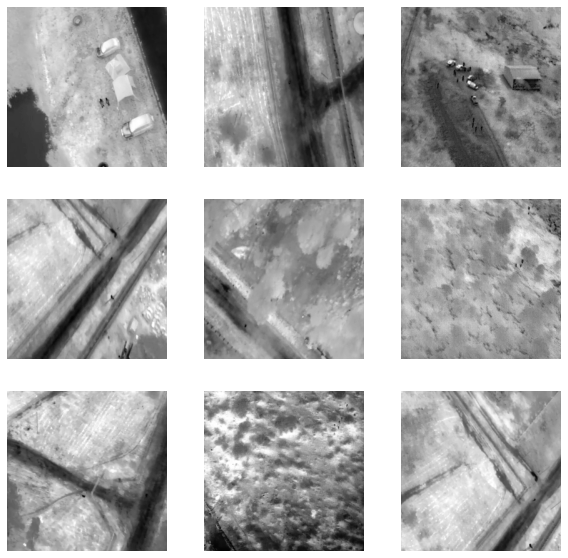

In [ ]:
# visualizing the data 
# train 
plt.figure(figsize=(10, 10))
for images in train_ds.take(1): # images are eager tensors with 'float32' dtype and shape [None,256,256,1], labels are not present
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().squeeze().astype('uint8') 
        plt.imshow(img, cmap='gray')
        #plt.title(int(labels[i]))
        plt.axis("off")

# as we can see in the plots, images with poachers are labelled as 1, images without poachers are labelled as 0

# visualizing the data 
# train 
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1): # images are eager tensors with 'float32' dtype and shape [64,256,256,1], labels are eager tensors with 'int32' dtype and shape (64,)
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         img = images[i].numpy().squeeze().astype('uint8') 
#         plt.imshow(img, cmap='gray')
#         plt.title(int(labels[i]))
#         plt.axis("off")

# as we can see in the plots, images with poachers are labelled as 1, images without poachers are labelled as 0

###DID NOT USE: loading data into arrays
This was before I understood COCO. Allows you to view the images though. Uses the concept from the actual challenge

In [ ]:
folder_path_train_images = '/content/Labeled_data/images/train/'
print(len(os.listdir(folder_path_train_images)), 'trainset poacher images' )

folder_path_val_images = '/content/Labeled_data/images/val'
print(len(os.listdir(folder_path_val_images)), 'valset poacher images' )

folder_path_test_images = '/content/Labeled_data/images'
print(len(os.listdir(folder_path_test_images)), 'test poacher images' )

# #attempt to convert files to png instead of PNG
# files = os.listdir(folder_path_train_images)
# for filename in files:
#     file_wo_ext, file_ext = os.path.splitext(filename)
#     if file_ext == ".PNG":
#         newfile = file_wo_ext + ".png"
#         os.rename(folder_path_train_images+filename, folder_path_train_images+newfile)

#attempt to convert files to PNG instead of png
files = os.listdir(folder_path_train_images)
for filename in files:
    file_wo_ext, file_ext = os.path.splitext(filename)
    if file_ext == ".png":
        newfile = file_wo_ext + ".PNG"
        os.rename(folder_path_train_images+filename, folder_path_train_images+newfile)

#THis is how they did it in the actual lab but it doesn't seem to work here
image_size = (256, 256)
batch_size = 64

print('train_ds')
train_ds = tf.keras.utils.image_dataset_from_directory(
    labels=None,
    directory=folder_path_train_images,
    batch_size=batch_size,
    color_mode = 'grayscale'
)


7904 trainset poacher images
3278 valset poacher images
1902 test poacher images
train_ds
Found 7904 files belonging to 1 classes.


# Step 3: Use transfer learning or build your own CNN from scratch to create an object detection model
I have chosen the YOLOv5 transfer learning (only really because it was used in the challenge and I am not sure how to pick these)


##3.1 Convert annotations from JSONCOCO2YOLO
This is done to use the COCO annotations in the YOLOv5 model

In [17]:
#clone JSON2YOLO 
!git clone https://github.com/ultralytics/JSON2YOLO.git  # clone repo
%cd JSON2YOLO
%pip install -qr requirements.txt # install dependencies
# %pip install -q roboflow

Cloning into 'JSON2YOLO'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 277 (delta 102), reused 84 (delta 82), pack-reused 164
Receiving objects: 100% (277/277), 74.65 KiB | 4.67 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/JSON2YOLO


In [18]:
%cd /content/JSON2YOLO

/content/JSON2YOLO


In [19]:
#try do the next line without this.. don't think it should be nessisary
!python general_json2yolo.py

In [20]:
from general_json2yolo import convert_coco_json

In [21]:
#converting the json files to YOLO format
#new folders with YOLO Format saved: /content/JSON2YOLO/new_dir/labels
convert_coco_json('/content/annotations_COCO/annotations_COCO')

Annotations /content/annotations_COCO/annotations_COCO/Copy of instances_test.json: 100%|██████████| 1900/1900 [00:00<00:00, 5218.84it/s]
Annotations /content/annotations_COCO/annotations_COCO/Copy of instances_train.json: 100%|██████████| 13111/13111 [00:02<00:00, 6383.89it/s]
Annotations /content/annotations_COCO/annotations_COCO/Copy of instances_val.json: 100%|██████████| 3278/3278 [00:00<00:00, 4649.28it/s]


In [22]:
#go back to the content dir and make a new dir where we will keep the new dataset in the required format for the YOLOv5 model
%cd ..
os.mkdir("converted_data")
%cd converted_data
os.mkdir("test")
os.mkdir("val")
os.mkdir("train")
%cd test
os.mkdir("images")
os.mkdir("labels")

/content/JSON2YOLO


In [ ]:
#renaming the directories to the required names
os.rename(src, dst)

In [ ]:
#copy results into the drive
!cp -r "/content/JSON2YOLO/new_dir/labels/train/" "/content/drive/MyDrive/Capstone_New_Labeled_Data/annotations"
!cp -r "/content/JSON2YOLO/new_dir/labels/test/" "/content/drive/MyDrive/Capstone_New_Labeled_Data/annotations"
!cp -r "/content/JSON2YOLO/new_dir/labels/val/" "/content/drive/MyDrive/Capstone_New_Labeled_Data/annotations"

In [ ]:
#copy results into the drive
!shutil.move("/content/JSON2YOLO/new_dir/labels/train/ "/content/drive/MyDrive/Capstone_New_Labeled_Data/annotations/train"
!cp "/content/JSON2YOLO/new_dir/labels/test/*.txt" "/content/drive/MyDrive/Capstone_New_Labeled_Data/annotations/test"
!cp "/content/JSON2YOLO/new_dir/labels/val/*.txt" "/content/drive/MyDrive/Capstone_New_Labeled_Data/annotations/val"

###DID NOT USE: 3.2.1 Install All requirements

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/JSON2YOLO/yolov5
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


## 3.1 Changing Data to YOLOv5 format for use in YOLOv5

###Copy the contents from the shared folder to my drive so I can change format

In [ ]:
%cd /content/drive/MyDrive/Labeled_data

/content/drive/.shortcut-targets-by-id/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe/Labeled data


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe/Labeled data


In [ ]:
!cp -r '/content/drive/.shortcut-targets-by-id/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe/Labeled data/.' '/content/drive/MyDrive/Capstone_New_Labeled_Data'

### DID NOT USE: Change format to YOLOv5 format
note that first I must change the folders in the drive to have the annotations in the same folder as the images

Okay just did this using the UI online as I could not figure out how to use the API

In [ ]:
# we'll change directory to the newly created folder of our images
%cd /content/drive/MyDrive/Capstone_New_Labeled_Data/images/test

/content/drive/MyDrive/Capstone_New_Labeled_Data/images/test


In [ ]:
# fill this in from your project's settings
MY_KEY = "hHJUSXPwaTUnqTgPRiGI"

In [ ]:
import os
import requests
import base64
import io
from PIL import Image

In [ ]:
for filename in os.listdir("."):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".PNG"):
      print(filename)

      # Load Image with PIL
      image = Image.open(filename).convert("RGB")

      # Convert to JPEG Buffer
      buffered = io.BytesIO()
      image.save(buffered, quality=90, format="JPEG")

      # Base 64 Encode
      img_str = base64.b64encode(buffered.getvalue())
      img_str = img_str.decode("ascii")



      # Construct the URL
      upload_url = "".join([
          "https://api.roboflow.com/dataset/matthew-van-den-berg-te46k/capstone_project-gq93u/upload",
          "?api_key=" + MY_KEY,
          "&name=" +str(filename),
          "&split=train"
      ])

      # POST to the API
      r = requests.post(upload_url, data=img_str, headers={
          "Content-Type": "application/x-www-form-urlencoded"
      })

      # Output result
      print(r.json())


      img_id = r.json()['id']

      annotation_filename = os.path.splitext(filename)[0]+'.json'
      print(annotation_filename)

      # Read Annotation as String
      annotation_str = open(annotation_filename, "r").read()

      # Construct the URL
      upload_url = "".join([
          "https://api.roboflow.com/dataset/chess-subsample/annotate/" + img_id,
          "?api_key=" + MY_KEY,
          "&name=", annotation_filename
      ])

      # POST to the API
      r = requests.post(upload_url, data=annotation_str, headers={
          "Content-Type": "text/plain"
      })

      # Output result
      print(r.json())

video82_2_000431.PNG


JSONDecodeError: ignored

##3.2. Now to start using YOLOv5
I'm going off the following youtube tutorial:
https://www.youtube.com/watch?v=GRtgLlwxpc4

##Modify some files to train off data
1. modify the coco128.yaml file -->  actually replace it with the YAML file from the roboflow download that has been modified as per the tutorial

ymal editor (only works on edge):
https://codebeautify.org/yaml-editor-online


In [ ]:
#yaml code:


# train: ../drive/MyDrive/Capstone_New_Labeled_Data/Capstone_Project.v1i.yolov5pytorch/train/
# val: ../drive/MyDrive/Capstone_New_Labeled_Data/Capstone_Project.v1i.yolov5pytorch/valid/
# test: ../content/drive/MyDrive/Capstone_New_Labeled_Data/Capstone_Project.v1i.yolov5pytorch/test/

# nc: 1
# names: ['Human']


#STEP 4: Training


##RoboFLow - Did not use 

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hHJUSXPwaTUnqTgPRiGI")
project = rf.workspace("").project("capstone_project")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...


TypeError: ignored

In [ ]:
project = rf.workspace("").project("capstone_project-gq93u")
dataset = project.version(1).download("yolov5")

NameError: ignored

##3.2. Actual Training now

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 256 --batch 50 --epochs 300 --data yaml-editor-online.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=yaml-editor-online.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=50, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 